In [1]:
# ! wget http://www.yellowstone.solutions/thredds/fileServer/daily_or_monthly/monthly/v2_2018_soil_water_monthly.nc4

--2020-03-11 19:46:45--  http://www.yellowstone.solutions/thredds/fileServer/daily_or_monthly/monthly/v2_2018_soil_water_monthly.nc4
Resolving www.yellowstone.solutions (www.yellowstone.solutions)... 34.213.214.131
Connecting to www.yellowstone.solutions (www.yellowstone.solutions)|34.213.214.131|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 464931581 (443M) [application/x-netcdf4]
Saving to: ‘v2_2018_soil_water_monthly.nc4’

v2_2018_soil_water_ 100%[===================>] 443.39M   109MB/s    in 3.7s    

2020-03-11 19:46:49 (121 MB/s) - ‘v2_2018_soil_water_monthly.nc4’ saved [464931581/464931581]



In [2]:
! ls

Untitled.ipynb	v2_2018_soil_water_monthly.nc4


In [5]:
import xarray as xr# single file
dataDIR = 'v2_2018_soil_water_monthly.nc4'
DS = xr.open_dataset(dataDIR, decode_times=False)

In [6]:
DS

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 12, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) float32 0.5 1.5 2.5 3.5 ... 9.5 10.5 11.5
Dimensions without coordinates: nv
Data variables:
    timeunit                 (time) int16 ...
    time_bnds                (time, nv) float32 ...
    lambert_conformal_conic  int16 ...
    soil_water               (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      Wed Jun 12 15:32:06 2019: ncatted -O -a units,time,o,c,mont...

In [9]:
sw = DS['soil_water']

In [10]:
sw

<xarray.DataArray 'soil_water' (time: 12, y: 8075, x: 7814)>
[757176600 values with dtype=float32]
Coordinates:
  * x        (x) float32 -4560250.0 -4559250.0 ... 3251750.0 3252750.0
  * y        (y) float32 4984000.0 4983000.0 4982000.0 ... -3089000.0 -3090000.0
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
  * time     (time) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Attributes:
    long_name:     soil_water
    units:         mm
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: minimum

In [14]:
sw['time'].values

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5], dtype=float32)

In [43]:
print(sw.loc[0.5].max())
print(sw.loc[0.5].min())

<xarray.DataArray 'soil_water' ()>
array(1153., dtype=float32)
Coordinates:
    time     float32 0.5
<xarray.DataArray 'soil_water' ()>
array(0., dtype=float32)
Coordinates:
    time     float32 0.5


In [45]:
type(sw.loc[0.5])

xarray.core.dataarray.DataArray

In [46]:
xd = sw.loc[0.5]

In [47]:
xd

<xarray.DataArray 'soil_water' (y: 8075, x: 7814)>
[63098050 values with dtype=float32]
Coordinates:
  * x        (x) float32 -4560250.0 -4559250.0 ... 3251750.0 3252750.0
  * y        (y) float32 4984000.0 4983000.0 4982000.0 ... -3089000.0 -3090000.0
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
    time     float32 0.5
Attributes:
    long_name:     soil_water
    units:         mm
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: minimum

In [52]:
maxa = xd.max().values

In [55]:
maxa.max()

1153.0

In [56]:
maxa.min()

1153.0

In [58]:
xd = sw.loc[0.5][4000][4000]

In [63]:
mla = xd.values

In [69]:
dir(mla)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [74]:
mla.item()

100.0

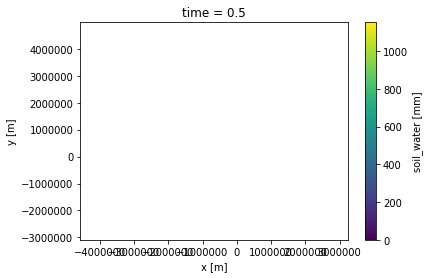

In [26]:
%matplotlib inline
sw.loc[0.5].plot()

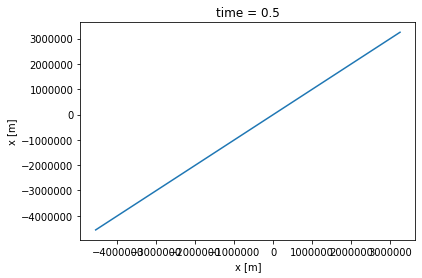

In [32]:
sw.loc[0.5]['x'].plot()

In [27]:
# import matplotlib.pyplot as plt

# newdata = sf_precip_2016 = precip_sf_xr['precipitation_amount'].values
# plt.plot(newdata) # plotting by columns